# 足し算回路
量子コンピュータの足し算回路を実装する

Jupyter detected...
2 channel Terms of Service accepted
Channels:
 - conda-forge
 - defaults
Platform: osx-arm64
Solving environment: done


==> WARNING: A newer version of conda exists. <==
    current version: 25.9.0
    latest version: 25.9.1

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Jupyter detected...
2 channel Terms of Service accepted
Channels:
 - conda-forge
 - defaults
Platform: osx-arm64
Solving environment: done


==> WARNING: A newer version of conda exists. <==
    current version: 25.9.0
    latest version: 25.9.1

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Jupyter detected...
2 channel Terms of Service accepted
Channels:
 - conda-forge
 - defaults
Platform: osx-arm64
Solving environment: done


==> WARNING: A newer version of conda exists. <==
    current version: 25.9.0
    latest version: 25.9.1

Please up

In [1]:
import qiskit
import qiskit_ibm_runtime
print("Qiskit:", qiskit.__version__)
print("Runtime:", qiskit_ibm_runtime.__version__)

Qiskit: 2.2.2
Runtime: 0.43.0


In [2]:
from qiskit.quantum_info import Statevector
from qiskit import transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_state_city, plot_histogram

def show_state_vector(qc):
  copied = qc.copy()
  copied.save_statevector()

  backend = Aer.get_backend('aer_simulator')
  compiled = transpile(copied, backend)
  result = backend.run(compiled).result()
  state = result.get_statevector(compiled)

  plot_state_city(state.reverse_qargs())
  # ビット表示を逆順にして出力
  display(state.reverse_qargs().draw(output='latex'))

## 1桁の足し算回路（全加算器）
インプットを1,1とすると、1 + 1で|10>が得られる。

<IPython.core.display.Latex object>

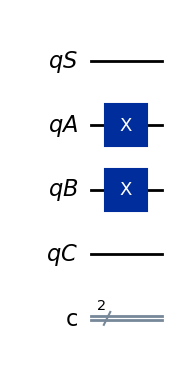

In [3]:
# 量子ビットを初期化
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

qS = QuantumRegister(1,'qS')
qA = QuantumRegister(1,'qA')
qB = QuantumRegister(1,'qB')
qC = QuantumRegister(1,'qC')
qc = QuantumCircuit(qS, qA, qB, qC)

cr = ClassicalRegister(2, 'c')
qc.add_register(cr)

# インプット qA=1, qB=1 => |10>
# 1 + 1 = |10>
# qc.x(qS)
qc.x(qA)
qc.x(qB)

show_state_vector(qc)
qc.draw('mpl')

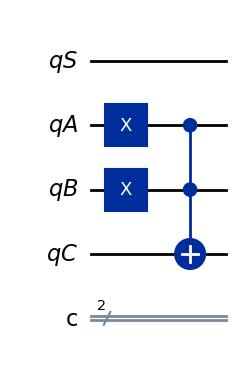

In [5]:
qc.ccx(qA, qB, qC)
qc.draw('mpl')

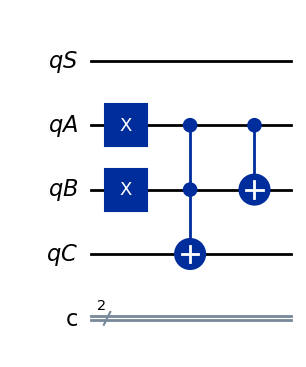

In [6]:
qc.cx(qA, qB)
qc.draw('mpl')

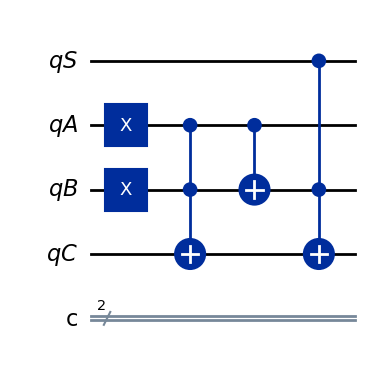

In [7]:
qc.ccx(qS, qB, qC)
qc.draw('mpl')

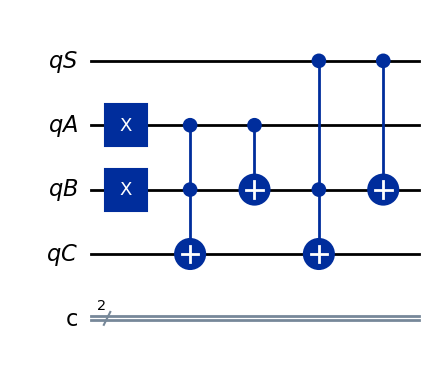

In [8]:
qc.cx(qS, qB)
qc.draw('mpl')

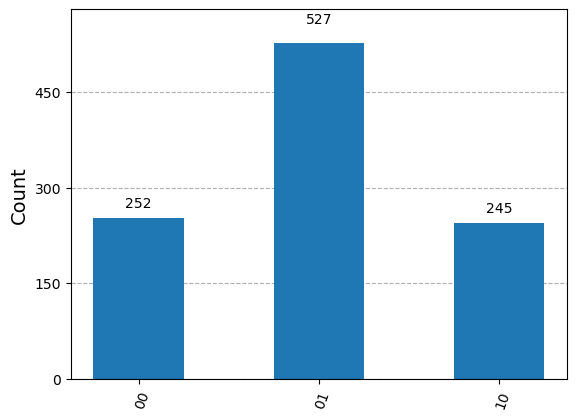

In [7]:
qc.measure(qB, cr[0])
qc.measure(qC, cr[1])

# qc.draw('mpl')

sim = Aer.get_backend('qasm_simulator')
t_qc = transpile(qc, sim)
result = sim.run(t_qc, shots=1024).result()
counts = result.get_counts()
display(plot_histogram(counts))

## 2桁の足し算
全加算器に、2量子ビットを追加して、1桁目の足し算回路を追加する。

インプットに11,11を与えると、11 + 11 = |110> が得られる。

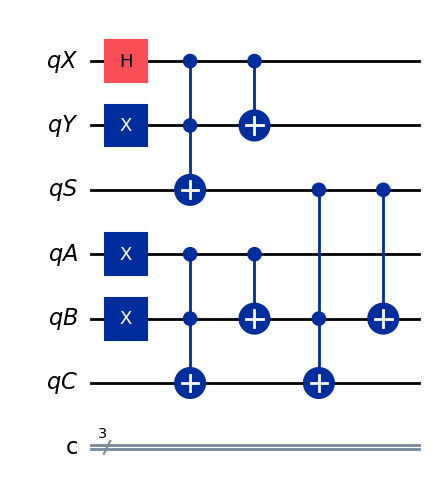

In [11]:
# 量子ビットを初期化
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_histogram # プロットに必要な関数をインポート

qX = QuantumRegister(1,'qX') # インプット1桁目
qY = QuantumRegister(1,'qY') # インプット1桁目
qS = QuantumRegister(1,'qS') # インプット1桁目の繰り上がり
qA = QuantumRegister(1,'qA') # インプット2桁目
qB = QuantumRegister(1,'qB') # インプット2桁目
qC = QuantumRegister(1,'qC') # インプット2桁目の繰り上がり
qc = QuantumCircuit(qX, qY, qS, qA, qB, qC)

cr = ClassicalRegister(3, 'c')
qc.add_register(cr)

# インプット qX=1, qY=1, qA=1, qB=1
# 11 + 11 => |110>
qc.h(qX)
# qc.x(qX)
qc.x(qY)
qc.x(qA)
qc.x(qB)

# アウトプット qY: 1桁目 qB: 2桁目 qC: 3桁目
# show_state_vector(qc)
# qc.draw('mpl')

# 回路を構築
qc.ccx(qX, qY, qS)
qc.cx(qX, qY)

qc.ccx(qA, qB, qC)
qc.cx(qA, qB)

qc.ccx(qS, qB, qC)
qc.cx(qS, qB)

qc.draw('mpl')

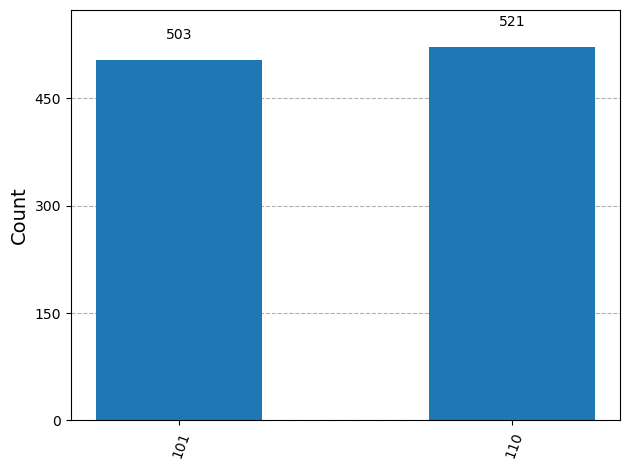

In [12]:
qc.measure(qY, cr[0])
qc.measure(qB, cr[1])
qc.measure(qC, cr[2])

sim = Aer.get_backend('qasm_simulator')
t_qc = transpile(qc, sim)
result = sim.run(t_qc, shots=1024).result()
counts = result.get_counts()
display(plot_histogram(counts))

## 量子コンピュータ実機で1桁の足し算回路（$2^2=4通りの計算$）

<IPython.core.display.Latex object>

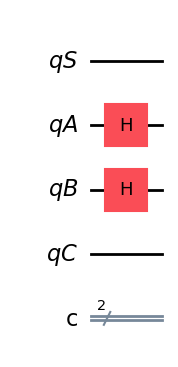

In [20]:
# 量子ビットを初期化
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

qS = QuantumRegister(1,'qS')
qA = QuantumRegister(1,'qA')
qB = QuantumRegister(1,'qB')
qC = QuantumRegister(1,'qC')
qc = QuantumCircuit(qS, qA, qB, qC)

cr = ClassicalRegister(2, 'c')
qc.add_register(cr)

# インプット qA=1/√2(|0>+|1>), qB=1/√2(|0>+|1>)
qc.h(qA)
qc.h(qB)

show_state_vector(qc)
qc.draw('mpl')

<IPython.core.display.Latex object>

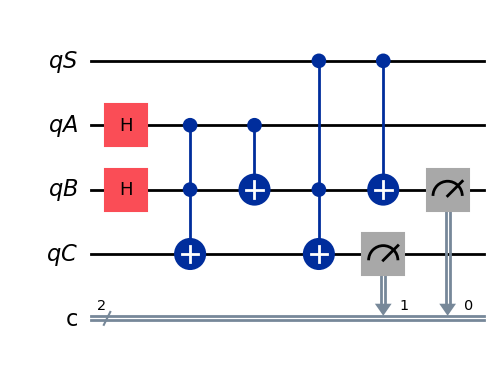

In [21]:
# 足し算回路
qc.ccx(qA, qB, qC)
qc.cx(qA, qB)
qc.ccx(qS, qB, qC)
qc.cx(qS, qB)

qc.measure(qC, cr[1]) # 2桁目（右から）を測定
qc.measure(qB, cr[0]) # 1桁目
qc.draw('mpl')

show_state_vector(qc)
qc.draw('mpl')

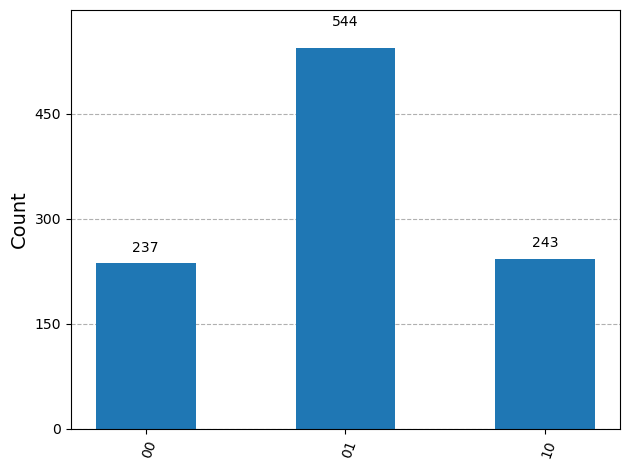

In [22]:
# シミュレータで測定
sim = Aer.get_backend('qasm_simulator')
t_qc = transpile(qc, sim)
result = sim.run(t_qc, shots=1024).result()
counts = result.get_counts()
display(plot_histogram(counts))

In [23]:
from qiskit import QuantumCircuit, transpile
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler

# IBM Quantumアカウントに接続（トークンが登録済みの場合）
# 初回は次のように登録する：
# QiskitRuntimeService.save_account(channel="ibm_quantum_platform", overwrite=True, token="API_TOKEN")
service = QiskitRuntimeService(channel="ibm_quantum_platform")

# 実機一覧を表示
# for backend in service.backends():
#     print(backend.name, backend.status().pending_jobs)

# 最も空いているバックエンドを自動選択
# backend = service.least_busy(operational=True)
backend = service.backend("ibm_brisbane")
print("backend: ", backend)

# # 量子回路の作成
# qc = QuantumCircuit(1, 1)
# qc.h(0)
# qc.measure(0, 0)

# サンプラー実行
t_qc = transpile(qc, backend)
sampler = Sampler(backend)
job = sampler.run([t_qc], shots=1024)

management.get:WARNING:2025-10-23 23:44:37,776: Loading default saved account
qiskit_runtime_service.__init__:WARNING:2025-10-23 23:44:40,403: Instance was not set at service instantiation. Free and trial plan instances will be prioritized. Based on the following filters: (tags: None, region: us-east, eu-de), and available plans: (open), the available account instances are: open-instance. If you need a specific instance set it explicitly either by using a saved account with a saved default instance or passing it in directly to QiskitRuntimeService().
qiskit_runtime_service.backends:WARNING:2025-10-23 23:44:40,405: Using instance: open-instance, plan: open


backend:  <IBMBackend('ibm_brisbane')>


In [24]:
print(job.job_id())
print(job.status())

d3t3umkv6o9s73csgjs0
DONE


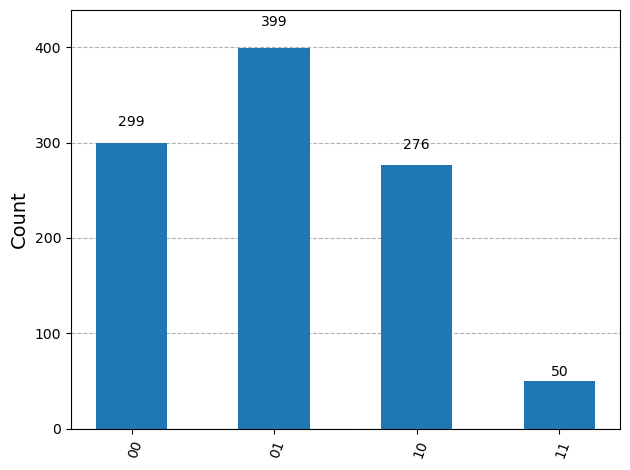

In [25]:
result = job.result()

pub_result = result[0]
counts = pub_result.data.c.get_counts()  # ← ここが新仕様

plot_histogram(counts)